In [9]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris['DESCR'])
print(iris['data'])
print(iris['data'][0])
print(iris['data'][0][0])
print(iris['target'])
print(iris['target_names'])
print(iris['feature_names'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1
 1 0 1 1 0 0 1 1 0 1 0 1 0 2 2 2 3 2 3 2 3 2 3 3 2 3 2 3 2 4 3 2 3 4 3 4 2
 2 2 2 2 2 3 3 3 3 4 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 6 4 6 6 6 5 3 5 6 5 6
 4 6 4 4 6 6 5 5 4 6 4 5 4 6 6 4 4 6 6 5 5 6 4 4 5 6 6 4 6 6 6 4 6 6 6 4 6
 6 4]


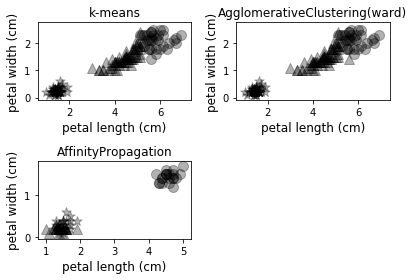

In [23]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import datasets

iris = datasets.load_iris()
data = iris['data']

model = cluster.KMeans(n_clusters=3)
model.fit(data)

model1 = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
model1.fit(data)

model2 = cluster.AffinityPropagation()
model2.fit(data)

labels = model.labels_
labels1 = model1.labels_
labels2 = model2.labels_

print(model.labels_)
print(model1.labels_)
print(model2.labels_)

def scatter2way(labels, title):
    plt.title(title)
    ldata = data[labels == 0]
    plt.scatter(ldata[:, 2], ldata[:, 3], c='black', alpha=0.3, s=100, marker="^")

    ldata = data[labels == 1]
    plt.scatter(ldata[:, 2], ldata[:, 3], c='black', alpha=0.3, s=100, marker="*")

    ldata = data[labels == 2]
    plt.scatter(ldata[:, 2], ldata[:, 3], c='black', alpha=0.3, s=100, marker="o")

    # 设置轴标签
    plt.xlabel(iris["feature_names"][2], fontsize = 'large')
    plt.ylabel(iris["feature_names"][3], fontsize = 'large')

plt.subplot(2, 2, 1)
scatter2way(labels, 'k-means')

plt.subplot(2, 2, 2)
scatter2way(labels1, 'AgglomerativeClustering(ward)')

plt.subplot(2, 2, 3)
scatter2way(labels2, 'AffinityPropagation')

plt.tight_layout()
plt.show()

## 类聚结果的可视化

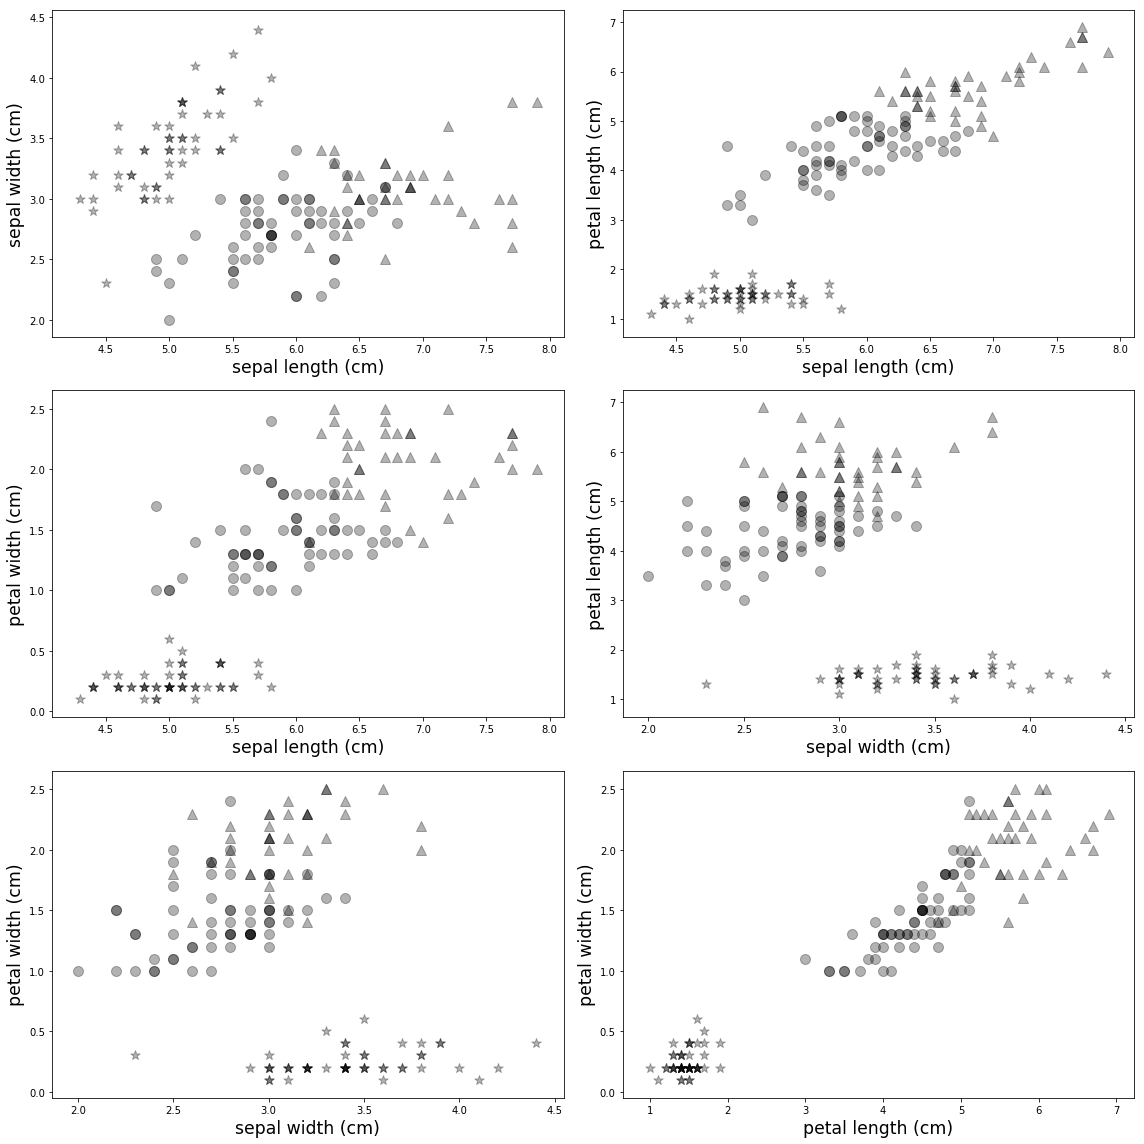

In [16]:
### 图表的绘制
MARKERS = ["o", "^", "*", "v", "+", "d", "p", "s", "1", "2"]

# 用于在指定索引的feature值中创建散布图的函数
def scatter_by_feature(feat_idx1, feat_idx2):
    for lbl in range(labels.max() + 1):
        clustered = data[labels == lbl]
        plt.scatter(clustered[:, feat_idx1], clustered[:, feat_idx2], c='black', alpha=0.3, s=100, marker=MARKERS[lbl], label='label {}'.format(lbl))

    plt.xlabel(iris["feature_names"][feat_idx1], fontsize='xx-large')
    plt.ylabel(iris["feature_names"][feat_idx2], fontsize='xx-large')


plt.figure(figsize=(16, 16))

# feature "sepal length" 和 "sepal width"
plt.subplot(3, 2, 1)
scatter_by_feature(0, 1)

# feature "sepal length" 和 "petal length"
plt.subplot(3, 2, 2)
scatter_by_feature(0, 2)

# feature "sepal length" 和 "petal width"
plt.subplot(3, 2, 3)
scatter_by_feature(0, 3)

# feature "sepal width" 和 "petal length"
plt.subplot(3, 2, 4)
scatter_by_feature(1, 2)

# feature "sepal width" 和 "petal width"
plt.subplot(3, 2, 5)
scatter_by_feature(1, 3)

# feature "petal width" 和 "petal width"
plt.subplot(3, 2, 6)
scatter_by_feature(2, 3)

plt.tight_layout()
plt.show()

## 花的种类和簇的关系

In [17]:
from sklearn import metrics
print(metrics.confusion_matrix(iris['target'], model.labels_))

[[ 0  0 50]
 [47  3  0]
 [14 36  0]]
